### Importation of libraries and dataset

In [1]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
phishing_websites = fetch_ucirepo(id=327)
X = phishing_websites.data.features
y = phishing_websites.data.targets

### Dataset analysis

Features shape: (11055, 30)
Target shape: (11055, 1)

First 5 rows of features:


,having_ip_address,url_length,shortining_service,having_at_symbol,double_slash_redirecting,prefix_suffix,having_sub_domain,sslfinal_state,domain_registration_length,favicon,...,rightclick,popupwindow,iframe,age_of_domain,dnsrecord,web_traffic,page_rank,google_index,links_pointing_to_page,statistical_report
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,1,-1,-1,-1,-1,1,1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,1,-1,-1,0,-1,1,1,1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,1,-1,1,-1,1,0,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,1,-1,-1,1,-1,1,-1,1
4,1,0,-1,1,1,-1,1,1,-1,1,...,1,-1,1,-1,-1,0,-1,1,1,1



Dataset Info :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   having_ip_address           11055 non-null  int64
 1   url_length                  11055 non-null  int64
 2   shortining_service          11055 non-null  int64
 3   having_at_symbol            11055 non-null  int64
 4   double_slash_redirecting    11055 non-null  int64
 5   prefix_suffix               11055 non-null  int64
 6   having_sub_domain           11055 non-null  int64
 7   sslfinal_state              11055 non-null  int64
 8   domain_registration_length  11055 non-null  int64
 9   favicon                     11055 non-null  int64
 10  port                        11055 non-null  int64
 11  https_token                 11055 non-null  int64
 12  request_url                 11055 non-null  int64
 13  url_of_anchor               11055 non-null  i

,having_ip_address,url_length,shortining_service,having_at_symbol,double_slash_redirecting,prefix_suffix,having_sub_domain,sslfinal_state,domain_registration_length,favicon,...,rightclick,popupwindow,iframe,age_of_domain,dnsrecord,web_traffic,page_rank,google_index,links_pointing_to_page,statistical_report
count,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,...,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000
mean,0.313795,-0.633198,0.738761,0.700588,0.741474,-0.734962,0.063953,0.250927,-0.336771,0.628584,...,0.913885,0.613388,0.816915,0.061239,0.377114,0.287291,-0.483673,0.721574,0.344007,0.719584
std,0.949534,0.766095,0.673998,0.713598,0.671011,0.678139,0.817518,0.911892,0.941629,0.777777,...,0.405991,0.789818,0.576784,0.998168,0.926209,0.827733,0.875289,0.692369,0.569944,0.694437
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,...,1.000000,1.000000,1.000000,-1.000000,-1.000000,0.000000,-1.000000,1.000000,0.000000,1.000000
50%,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,0.000000,1.000000,-1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,0.000000,1.000000
75%,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000



Target Distribution :
result
 1        6157
-1        4898
Name: count, dtype: int64


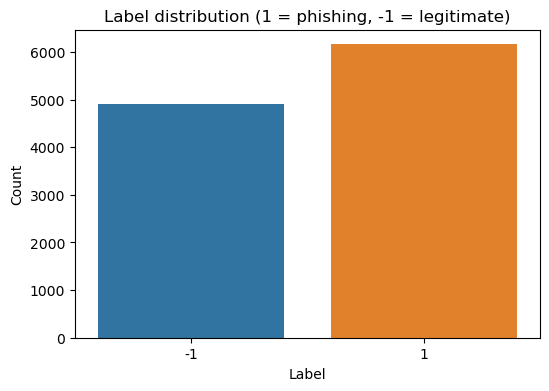

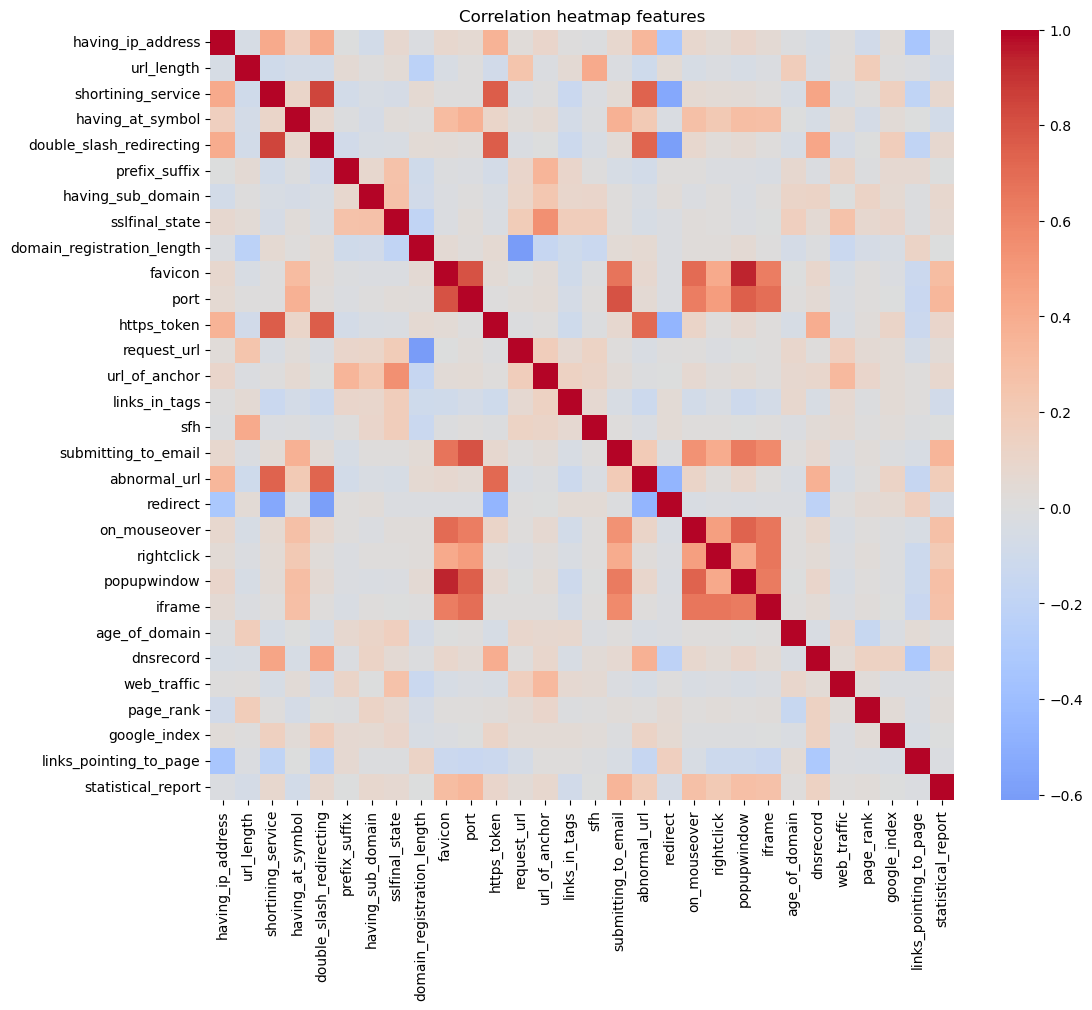

In [2]:
print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}\n")
print("First 5 rows of features:")
display(X.head())
print("\nDataset Info :")
print(X.info())
print("\nMissing Values :")
print(X.isna().sum().sum())
print("\nDescriptive Statistics :")
display(X.describe())
print("\nTarget Distribution :")
print(y.value_counts())

y_series = pd.Series(y.values.ravel(), name="label")

plt.figure(figsize=(6,4))
sns.countplot(x=y_series)
plt.title("Label distribution (1 = phishing, -1 = legitimate)")
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()

#corelation heatmap
plt.figure(figsize=(12,10))
sns.heatmap(X.corr(), cmap="coolwarm", center=0)
plt.title("Correlation heatmap features")
plt.show()

### Duplicate Analysis

This section analyzes duplicate rows in the phishing websites dataset.

Important note on duplicates:
This dataset uses discrete features with values limited to {-1, 0, 1}, representing boolean 
properties of websites (for example: presence of IP address, SSL state, etc.). With 30 binary or 
ternary features, the number of unique possible combinations is naturally limited. 

As a result, a high duplicate rate (>70%) is expected and normal for this dataset. 
Phishing websites often share the same technical signatures, so many rows will have identical 
feature values.

What matters to check:
1. Labeling conflicts (same features, different targets) - indicates a real problem
2. Class distribution (balance between phishing and legitimate sites)
3. Overall data consistency


In [17]:
# Check for duplicates in the dataset
data_complete = pd.concat([X, y], axis=1)

# Complete duplicates (same features and target)
complete_duplicates = data_complete.duplicated(keep=False).sum()
print(f"\nComplete duplicates: {complete_duplicates} ({complete_duplicates/len(data_complete)*100:.1f}%)")

# Feature duplicates (ignoring target)
feature_duplicates = X.duplicated(keep=False).sum()
unique_combinations = X.drop_duplicates().shape[0]
print(f"Feature duplicates: {feature_duplicates} ({feature_duplicates/len(X)*100:.1f}%)")
print(f"Unique feature combinations: {unique_combinations}")

# Check for labeling conflicts (same features, different labels)
print("\nChecking for labeling conflicts :")
conflicts = 0
conflict_rows = 0

if feature_duplicates > 0:
    for features in X[X.duplicated(keep=False)].drop_duplicates().values:
        mask = (X == features).all(axis=1)
        labels = y.loc[mask].iloc[:, 0].unique()
        if len(labels) > 1:
            conflicts += 1
            conflict_rows += mask.sum()

print(f"Found {conflicts} conflicting feature groups")
if conflicts > 0:
    print(f"Total rows with conflicts: {conflict_rows} ({conflict_rows/len(X)*100:.1f}%)")
    print("Note: These should be investigated as they have the same features but different labels")

# Feature characteristics
print("\nFeature characteristics:")
cardinality = X.nunique()
print(f"Binary features (2 values): {(cardinality == 2).sum()}")
print(f"Ternary features (3 values): {(cardinality == 3).sum()}")



Complete duplicates: 7843 (70.9%)
Feature duplicates: 7884 (71.3%)
Unique feature combinations: 5785

Checking for labeling conflicts :
Found 64 conflicting feature groups
Total rows with conflicts: 357 (3.2%)
Note: These should be investigated as they have the same features but different labels

Feature characteristics:
Binary features (2 values): 22
Ternary features (3 values): 8


Summary:
The high duplicate rate is normal for this dataset since features are discrete (values -1, 0, 1). Many phishing sites share similar characteristics, which explains why 5785 unique combinations appear 1.9 times on average.


### Outlier Analysis

This section detects and analyzes outliers in the dataset using Isolation Forest.

In [16]:
# Outlier Analysis using Isolation Forest
from sklearn.ensemble import IsolationForest


# Detect outliers using Isolation Forest
iso_forest = IsolationForest(contamination=0.05, random_state=42)
outliers = iso_forest.fit_predict(X)
outlier_count = (outliers == -1).sum()

print(f"\nOutliers detected: {outlier_count} ({outlier_count/len(X)*100:.1f}%)")
print("(Using Isolation Forest with 5% contamination)")

# Check class distribution
print("\nClass distribution:")
print(y.iloc[:, 0].value_counts().sort_index())
print()
print(y.iloc[:, 0].value_counts(normalize=True).sort_index() * 100)

# Calculate class imbalance
class_counts = y.iloc[:, 0].value_counts()
if len(class_counts) == 2:
    ratio = class_counts.iloc[0] / class_counts.iloc[1]
    print(f"\nClass imbalance ratio: {ratio:.2f}:1")

# Check outliers per class
print("\nOutliers by class:")
for class_label in y.iloc[:, 0].unique():
    class_mask = y.iloc[:, 0] == class_label
    class_outliers = (outliers[class_mask] == -1).sum()
    total_class = class_mask.sum()
    print(f"Class {class_label}: {class_outliers} outliers ({class_outliers/total_class*100:.1f}%)")




Outliers detected: 553 (5.0%)
(Using Isolation Forest with 5% contamination)

Class distribution:
result
-1    4898
 1    6157
Name: count, dtype: int64

result
-1    44.305744
 1    55.694256
Name: proportion, dtype: float64

Class imbalance ratio: 1.26:1

Outliers by class:
Class -1: 353 outliers (7.2%)
Class 1: 200 outliers (3.2%)


We detected 553 outliers (5%) using Isolation Forest, which is expected since we set the contamination parameter to 0.05. These represent websites with unusual or rare feature combinations.
The dataset has good class balance with 55.7% legitimate sites and 44.3% phishing sites, giving a class imbalance ratio of 1.26:1 which is reasonable for classification tasks.

One interesting finding is that phishing sites have more outliers (7.2%) compared to legitimate sites (3.2%). This makes sense because phishing websites use a wider variety of techniques and attack methods, while legitimate sites tend to follow more standard patterns. This is actually a good sign that our dataset captures the real-world complexity of the problem.

Overall, the data is well-balanced and ready for model training without requiring special handling for class imbalance.

### Overall Dataset Quality Assessment

Based on the comprehensive analysis of duplicates, outliers, and class distribution, this dataset demonstrates good quality for machine learning:

**Strengths:**
- No missing values in the dataset
- Well-balanced classes (1.26:1 ratio) - excellent for classification
- Sufficient sample size (11055 records)
- Discrete features are properly encoded ({-1, 0, 1}) and consistent
- 22 binary features and 8 ternary features provide solid dimensionality
- Outlier distribution is reasonable and logically explained

**Areas of Attention:**
- 64 labeling conflicts (3.2% of data) should be investigated before final model deployment
- High duplicate rate (70.9%) is normal for this domain but means the effective unique patterns are limited to ~5785 combinations
- Model generalization may be affected by the limited feature space diversity

**Recommendations:**
1. Keep all records including duplicates - they represent real-world patterns
2. Consider investigating the 64 conflicting cases to understand if they represent true ambiguities or labeling errors
3. Use stratified cross-validation during model training to preserve class distribution
4. Monitor model performance on both phishing and legitimate site classes separately
5. The dataset is ready for training with standard approaches; no special preprocessing required

**Overall Rating: GOOD** - The dataset is suitable for building a phishing detection classifier with expected performance. While the high duplicate rate initially appears concerning, it is characteristic of discrete feature datasets and does not indicate data quality issues.

### Data Pre-processing

Cette section prépare les données pour l'entraînement du modèle. Nous effectuons les transformations suivantes:
1. **Encodage de la target**: Conversion de (-1, 1) à (0, 1) pour compatibilité avec les métriques standard
2. **Normalisation**: Application du StandardScaler pour mettre à l'échelle les features
3. **Train-test split**: Division stratifiée pour maintenir l'équilibre des classes


In [ ]:
#Encode target (-1,1) to (0,1) 
y_binary = y.replace({-1: 0, 1: 1})

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y_binary, test_size=0.25, random_state=42, stratify=y_binary
)

#standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("\nTrain set:", X_train.shape, " Test set:", X_test.shape)


Train set: (8291, 30)  Test set: (2764, 30)


### Creation of the first models + hyperparameter tuning

Dans cette section, nous construisons des modèles de baseline et les optimisons via tuning d'hyperparamètres.
Nous utilisons RandomForest comme modèle initial, qui est robuste et fournit une bonne performance de base.
Les hyperparamètres sont ajustés pour améliorer la précision et réduire l'overfitting.


Training baseline model (Random Forest)

Baseline Model Evaluation :
Accuracy: 0.9750361794500724

Classification Report :
               precision    recall  f1-score   support

           0       0.98      0.96      0.97      1225
           1       0.97      0.99      0.98      1539

    accuracy                           0.98      2764
   macro avg       0.98      0.97      0.97      2764
weighted avg       0.98      0.98      0.98      2764



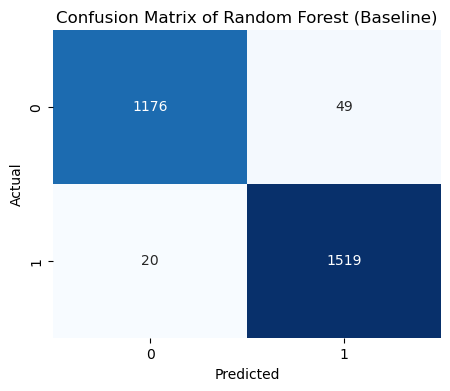

In [ ]:
print("\nTraining baseline model (Random Forest)")
model = RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1)
model.fit(X_train, y_train.values.ravel())
y_pred = model.predict(X_test)
#evaluation
print("\nBaseline Model Evaluation :")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report :\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix of Random Forest (Baseline)")
plt.show()

### Address overfitting / underfitting

### Relevant metrics

### Dimension reduction

### Ensemble models + advanced models

### Comparison of models + Conclusion